# Lab One

Business Understanding:

The data was collected as a comprehensive repository of Formula 1 data, capturing race results, driver and constructor standings, lap times, pit stop details, circuit information, etc. It serves as a valuable resource for Teams, researchers, and fans to study the evolution of the sport, understand performance trends, and uncover factors that contribute to success in Formula 1.
 
By analyzing this historical data, we can identify trends, patterns, and correlations that provide predictive insights. For instance, we can explore whether specific driver characteristics contribute to their likelihood of winning races or becoming season champions. Additionally, we can measure the impact of pit stop times and frequency on a driver's chances of finishing on the podium. 

To ensure the accuracy and completeness of the dataset, data validation processes are crucial. Data validation processes can include cross-referencing with official Formula 1 records, comparing results across multiple sources, and performing data quality checks to identify and correct any inconsistencies or missing information.

The effectiveness of prediction algorithms can be assessed by measuring their accuracy in predicting race outcomes, driver standings, and lap times. By comparing the algorithm's predictions to actual results, we can gauge its performance in these specific areas.

Data Understanding:
    
Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file
    
  There are three datasets focusing on the Drivers. The first dataset provides basic information such as names, dates of birth, and nationalities. The second dataset, Driver Standings, tracks the drivers' positions and points in the competition for each race of every season. The last dataset, Driver Results, contains attributes related to a driver's race performance, including points, positions, fastest lap times, the constructor they raced for, starting grid positions, etc.
    
  The Pitstop dataset records details of each driver's pitstop, including the time it took. The Qualifying dataset shows where each driver qualified on the grid for each race, as well as a breakdown of their times for each qualifying session. 

  Smaller tables such as the Status dataset explains the meaning behind each Status ID, which is included in other datasets such as Driver Results. The Status ID represents various incidents that can occur during a race and impact performance.



In [217]:
# general
import os
import numpy as np
import pandas as pd

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
from IPython.display import Image

# predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

pd.set_option('display.max_columns', None)

In [7]:
drivers = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/drivers.csv")
driver_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/driver_standings.csv", sep = ",")
driver_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/results.csv")
lap_times = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/lap_times.csv")
pit_stops = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/pit_stops.csv")
qualifying = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/qualifying.csv")
races = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/races.csv")
sprint_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/sprint_results.csv")
status = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/status.csv")
constructors = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructors.csv")
constructor_standings = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_standings.csv")
constructor_results = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/constructor_results.csv")
circuits = pd.read_csv("https://raw.githubusercontent.com/the-mcw/ML1/main/data/circuits.csv")

In [181]:
status.iloc[[75]]

,statusId,status
75,76,Vibrations


In [163]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [91]:
driver_results.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [11]:
lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [12]:
pit_stops.info()
pit_stops.milliseconds.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


72401.7306414781

In [13]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


In [1]:
races.info()
circuits.head()

NameError: name 'races' is not defined

In [15]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [16]:
#constructors.head()
constructor_standings.head()
#constructor_standings.info()
#constructor_results.head()
#constructor_results.info()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


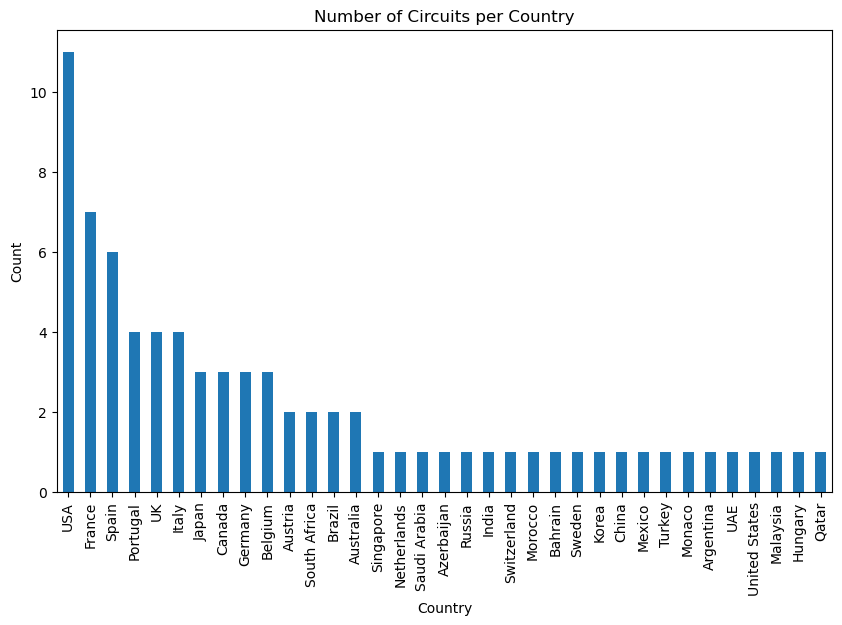

In [17]:

country_counts = circuits['country'].value_counts()
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Number of Circuits per Country')
plt.show()

In [18]:
# Merge drivers and driver_standings based on driver.id
driver_1 = pd.merge(drivers, driver_standings, on='driverId', how='outer')

In [161]:
driver_1.info()
driver_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33909 entries, 0 to 33908
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverId           33909 non-null  int64  
 1   driverRef          33909 non-null  object 
 2   number             33909 non-null  object 
 3   code               33909 non-null  object 
 4   forename           33909 non-null  object 
 5   surname            33909 non-null  object 
 6   dob                33909 non-null  object 
 7   nationality        33909 non-null  object 
 8   url                33909 non-null  object 
 9   driverStandingsId  33902 non-null  float64
 10  raceId             33902 non-null  float64
 11  points             33902 non-null  float64
 12  position           33902 non-null  float64
 13  positionText       33902 non-null  object 
 14  wins               33902 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 4.1+ MB
<class 'panda

In [358]:
driver_results.position = driver_results.position.replace('\\N',np.NaN).astype(np.float64)
driver_results.rank = driver_results['rank'].replace('\\N',np.NaN).astype(np.float64)
driver_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         14989 non-null  float64
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [345]:
drivers_2 = pd.merge(driver_1.drop(columns=['positionText','url']), driver_results.drop(columns=['number','positionText']), on=('driverId','raceId'), how='outer', suffixes=('Season','Race'))

In [162]:
drivers_2.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,driverStandingsId,raceId,pointsSeason,positionSeason,wins,resultId,constructorId,grid,positionRace,positionOrder,pointsRace,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,1.0,18.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,9.0,19.0,14.0,1.0,1.0,27.0,1.0,9.0,5.0,5.0,4.0,56.0,+46.548,5525103,53,3,1:35.462,209.033,1.0
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,27.0,20.0,14.0,3.0,1.0,57.0,1.0,3.0,13.0,13.0,0.0,56.0,\N,\N,25,19,1:35.520,203.969,11.0
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,48.0,21.0,20.0,2.0,1.0,69.0,1.0,5.0,3.0,3.0,6.0,66.0,+4.187,5903238,20,3,1:22.017,204.323,1.0
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,69.0,22.0,28.0,3.0,1.0,90.0,1.0,3.0,2.0,2.0,8.0,58.0,+3.779,5213230,31,2,1:26.529,222.085,1.0


In [362]:
drivers_3 = pd.merge(drivers_2,races.loc[(races['year'] >= 2011) & (races['year'] <= 2020),["raceId","year","date"]], on='raceId')
drivers_3['rank'] = drivers_3['rank'].replace('\\N',np.NaN).astype(np.float64)
#drivers_3.head()

In [363]:
drivers_3['podium'] = drivers_3.positionRace<4

drivers_3.dob = pd.to_datetime(drivers_3.dob) 
drivers_3.date = pd.to_datetime(drivers_3.date) 
drivers_3['age'] = (drivers_3.date-drivers_3.dob)/np.timedelta64(1,'Y')
drivers_3.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,driverStandingsId,raceId,pointsSeason,positionSeason,wins,resultId,constructorId,grid,positionRace,positionOrder,pointsRace,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,date,podium,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,68157.0,969.0,18.0,2.0,0.0,23380.0,131.0,1.0,2.0,2.0,18.0,57.0,+9.975,5061647,44,6.0,1:27.033,219.351,1.0,2017,2017-03-26,True,32.214214
1,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,68169.0,969.0,0.0,14.0,0.0,23392.0,1.0,12.0,NaN,14.0,0.0,50.0,\N,\N,48,17.0,1:30.077,211.938,76.0,2017,2017-03-26,False,35.658501
2,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,68159.0,969.0,12.0,4.0,0.0,23382.0,6.0,4.0,4.0,4.0,12.0,57.0,+22.393,5074065,56,1.0,1:26.538,220.605,1.0,2017,2017-03-26,False,37.440878
3,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,68161.0,969.0,8.0,6.0,0.0,23384.0,3.0,7.0,6.0,6.0,8.0,57.0,+1:23.386,5135058,49,9.0,1:28.045,216.830,1.0,2017,2017-03-26,False,35.918602
4,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,68156.0,969.0,25.0,1.0,1.0,23379.0,6.0,2.0,1.0,1.0,25.0,57.0,1:24:11.672,5051672,53,3.0,1:26.638,220.351,1.0,2017,2017-03-26,True,29.730932


In [348]:
#Top 10 Drivers with the most wins per season

#SortedByWins = drivers_2.sort_values(by='wins', ascending=False)
#Top10Drivers = SortedByWins.head(10)
#result = Top10Drivers[['driverId','forename', 'surname', 'wins', 'nationality']]
#result = result.drop_duplicates(subset='driverId')
drivers_winsperyear = drivers_3.sort_values('wins', ascending=False).groupby(by=['driverRef','year']).first().reset_index()
top_ten_drivers = drivers_winsperyear.sort_values('wins',ascending=False).head(10)[['driverId','forename','surname','nationality','year','wins']]
print(top_ten_drivers)

#ISSUE - only pulling in Max, not sure which step to filter only unique values. Will come back to this.

     driverId   forename   surname nationality  year  wins
221        20  Sebastian    Vettel      German  2013  13.0
73          1      Lewis  Hamilton     British  2019  11.0
68          1      Lewis  Hamilton     British  2014  11.0
72          1      Lewis  Hamilton     British  2018  11.0
219        20  Sebastian    Vettel      German  2011  11.0
74          1      Lewis  Hamilton     British  2020  11.0
69          1      Lewis  Hamilton     British  2015  10.0
70          1      Lewis  Hamilton     British  2016  10.0
71          1      Lewis  Hamilton     British  2017   9.0
192         3       Nico   Rosberg      German  2016   9.0


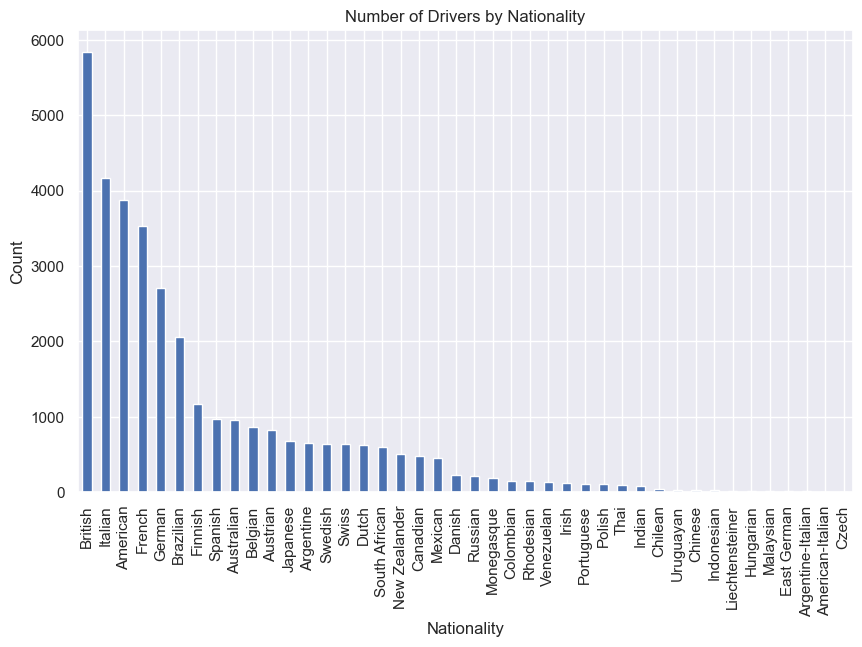

In [349]:
#Nationalities of F1 drivers

nationality_counts = drivers_2['nationality'].value_counts()
plt.figure(figsize=(10, 6))
nationality_counts.plot(kind='bar')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Number of Drivers by Nationality')
plt.show()



In [350]:
#Combine Race and Pitstop Dataset to see average time of Pitstops in the years 2011-2020

race_1 = pd.merge(races, pit_stops, on='raceId', how='outer')

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N
1101,1120,2023,23,24,Abu Dhabi Grand Prix,2023-11-26,13:00:00,https://en.wikipedia.org/wiki/2023_Abu_Dhabi_G...,2023-11-24,09:30:00,2023-11-24,13:00:00,2023-11-25,10:30:00,2023-11-25,14:00:00,\N,\N


In [296]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [351]:
race_1 = pd.merge(races, pit_stops, on='raceId', how='outer')
race_1 = race_1.rename(columns={'time_y':'TimeOfPitStop'})

In [352]:
#Filtering Race seasons 2011 - 2020

race_2011_2020 = race_1.loc[(race_1['year'] >= 2011) & (race_1['year'] <= 2020)]
#race_2011_2020.duration = race_2011_2020.duration.astype(np.float64)
race_2011_2020.head()#loc[race_2011_2020.duration == "16:44.718"]

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverId,stop,lap,TimeOfPitStop,duration,milliseconds
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,153.0,1.0,1.0,17:05:23,26.898,26898.0
840,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,30.0,1.0,1.0,17:05:52,25.021,25021.0
841,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,17.0,1.0,11.0,17:20:48,23.426,23426.0
842,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,4.0,1.0,12.0,17:22:34,23.251,23251.0
843,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,13.0,1.0,13.0,17:24:10,23.842,23842.0


In [353]:
duration_summary = race_2011_2020['duration'].describe()
print(duration_summary)

count       8031
unique      5819
top       22.745
freq           6
Name: duration, dtype: object


In [354]:
duration_highest = race_2011_2020['duration'].max()
print("longest race =", duration_highest)

longest race = 59.555


In [38]:
duration_lowest = race_2011_2020['duration'].min()
print("shortest race =",duration_lowest)

shortest race = 12.897


In [355]:
drivers_3.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,driverStandingsId,raceId,pointsSeason,positionSeason,wins,resultId,constructorId,grid,positionRace,positionOrder,pointsRace,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,date,podium,age
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,68157.0,969.0,18.0,2.0,0.0,23380.0,131.0,1.0,2.0,2.0,18.0,57.0,+9.975,5061647,44,6,1:27.033,219.351,1.0,2017,2017-03-26,True,32.214214
1,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,68169.0,969.0,0.0,14.0,0.0,23392.0,1.0,12.0,NaN,14.0,0.0,50.0,\N,\N,48,17,1:30.077,211.938,76.0,2017,2017-03-26,False,35.658501
2,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,68159.0,969.0,12.0,4.0,0.0,23382.0,6.0,4.0,4.0,4.0,12.0,57.0,+22.393,5074065,56,1,1:26.538,220.605,1.0,2017,2017-03-26,False,37.440878
3,13,massa,19,MAS,Felipe,Massa,1981-04-25,Brazilian,68161.0,969.0,8.0,6.0,0.0,23384.0,3.0,7.0,6.0,6.0,8.0,57.0,+1:23.386,5135058,49,9,1:28.045,216.830,1.0,2017,2017-03-26,False,35.918602
4,20,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,68156.0,969.0,25.0,1.0,1.0,23379.0,6.0,2.0,1.0,1.0,25.0,57.0,1:24:11.672,5051672,53,3,1:26.638,220.351,1.0,2017,2017-03-26,True,29.730932


<Axes: xlabel='podium', ylabel='age'>

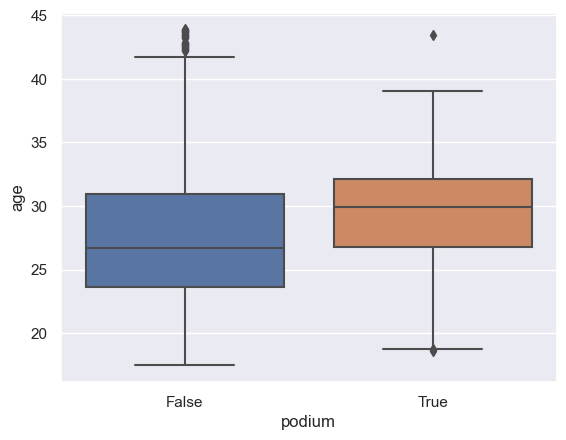

In [356]:
sns.boxplot(x = 'podium', y = 'age',data = drivers_3)

In [364]:

short_drivers = drivers_3[['podium','positionSeason','wins','grid','rank','age']]
short_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4378 entries, 0 to 4377
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   podium          4378 non-null   bool   
 1   positionSeason  4374 non-null   float64
 2   wins            4374 non-null   float64
 3   grid            4181 non-null   float64
 4   rank            4181 non-null   float64
 5   age             4374 non-null   float64
dtypes: bool(1), float64(5)
memory usage: 209.5 KB


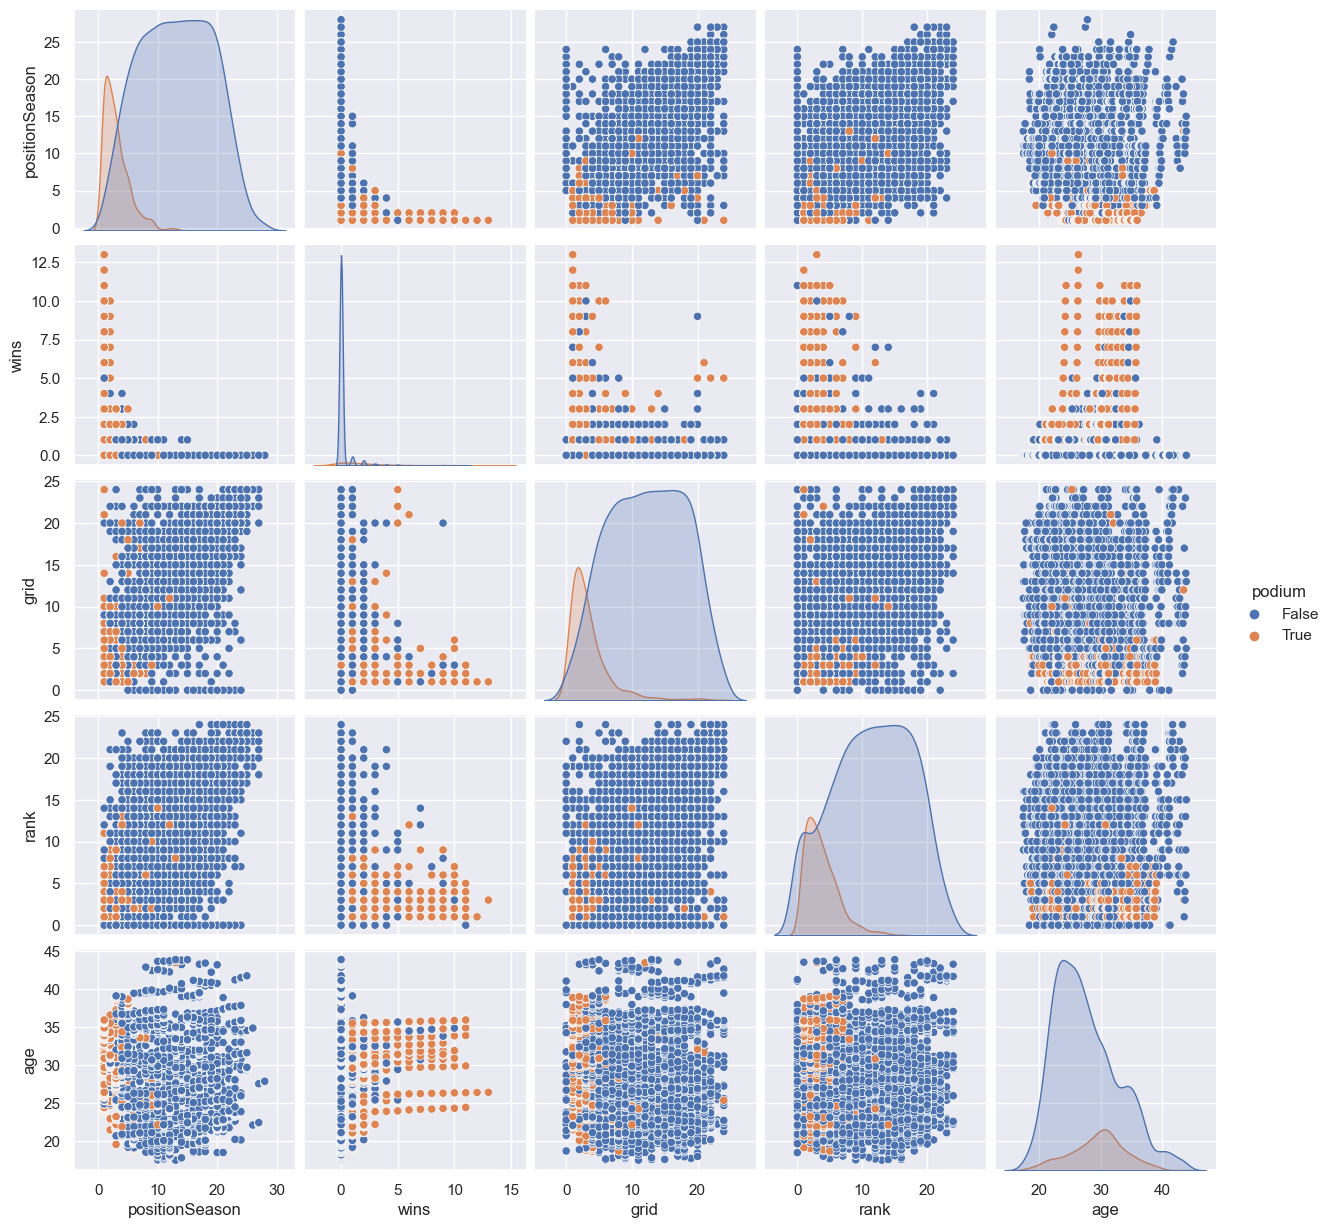

In [365]:
sns.pairplot(short_drivers,hue='podium')

pointSeason appears to be linearly correlated with both grid and rank, however they don't really appear correlated with eachother. Furthermore, pointsSeason x grid especially appears to have a relatively defined seperation forming.

The lines that appear for podium finished in the relationships with age, and are expecially apparent in age x wins, are likely due to the dependent nature of our data and are following the race results of the champions of the 10 seasons that make up our data.

C:\Users\Christopher\AppData\Local\Temp\ipykernel_28712\2351809732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_2011_2020['seconds'] = race_2011_2020.loc[:,'milliseconds']/1000


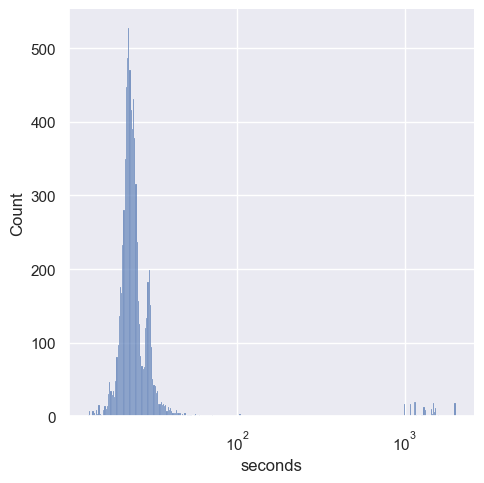

In [333]:
race_2011_2020['seconds'] = race_2011_2020.loc[:,'milliseconds']/1000
sns.displot(data = race_2011_2020, x = 'seconds', log_scale=True)

PCA stuff

In [384]:
from sklearn.decomposition import PCA

drivers_3.rank = drivers_3['rank'].replace('\\N',np.NaN).astype(np.float64)
drivers_3.fastestLapSpeed = drivers_3.fastestLapSpeed.replace('\\N',np.NaN).astype(np.float64)
temp = drivers_3.iloc[:,[10,12,15,23,25,29,30]].dropna()
X = temp.loc[:,temp.columns!='podium']
Y = temp.podium

pca = PCA(n_components=4)
X_pca = pd.DataFrame(pca.fit(X).transform(X))
X_pca
pca_comp = pd.DataFrame(pca.components_, columns=X.columns.values)
pca_comp
#names = pd.DataFrame(X.columns.values).astype('string').transpose()
#pca1+'x'+names

,pointsSeason,wins,grid,rank,fastestLapSpeed,age
0,0.996979,0.016716,-0.051142,-0.044429,0.031111,0.013983
1,0.034122,0.001497,0.019984,0.045348,-0.998181,0.003402
2,0.066718,0.020973,0.705164,0.697977,0.047827,-0.091614
3,-0.008262,-0.004232,0.006590,0.123884,0.008853,0.992192


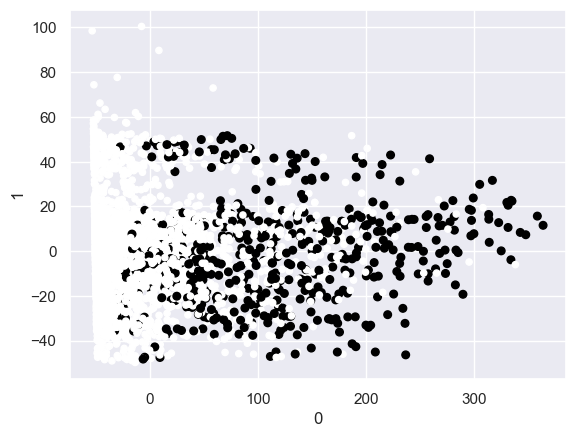

In [385]:
ax = X_pca.plot.scatter(0, 1, c=Y, s=(Y+2)*10)

plt.show()

<Axes: xlabel='pointsSeason', ylabel='fastestLapSpeed'>

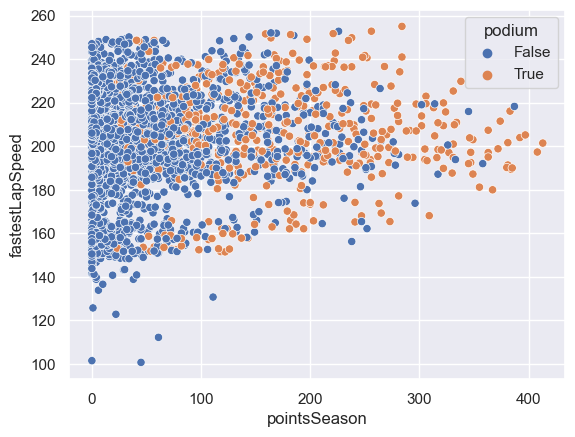

In [377]:
sns.scatterplot(data=drivers_3,x = 'pointsSeason',y = 'fastestLapSpeed',hue='podium',hue_order=(False,True))

The seperation created from the first two principle components is which in reality are just pointsSeason and fastestLapSpeed, are substantial. While there is still a great deal of overlap, a huge portion of the non-podium finishers are completely seperated from the podium finishers, and further right there begins to be, while sparser in general, a higher relative density of podium finishers to non-podium finishers.

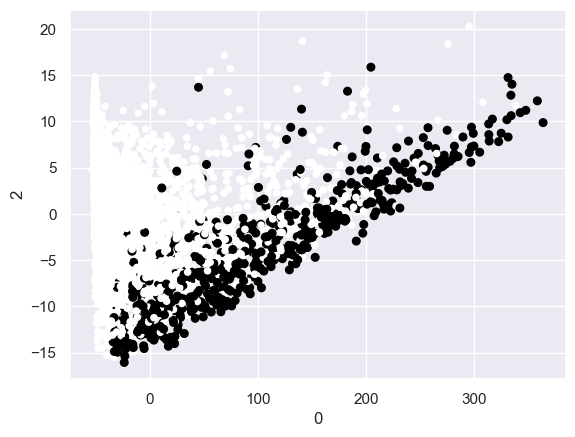

In [390]:
ax = X_pca.plot.scatter(0, 2, c=Y, s=(Y+2)*10)

plt.show()

Looking at the first and third principle components there appears to be better seperation, than with the first two. This plot also leads me to believe that some transformation to pointsSeason may really help this as well.